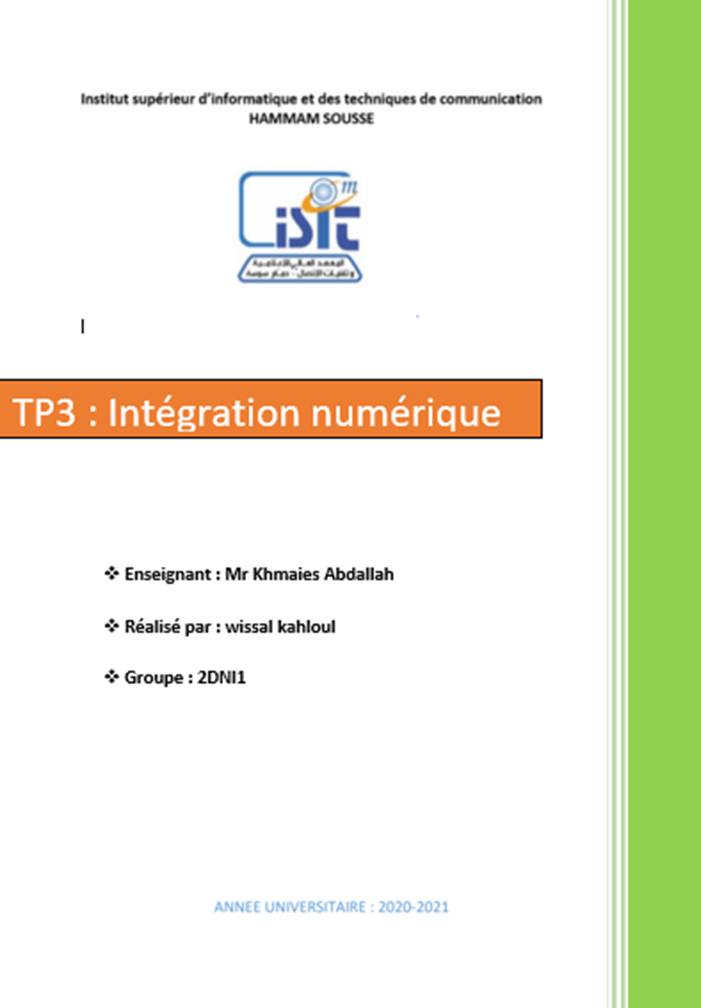

<span style ="color:red">
    <h2>TP3 mini projet integration numerique
    </h2></span>

**<h2><span style ="color:skyblue "> Les méthodes d'intégration numérique </span></h2>**

* ### Le but

Le but de ce chapitre est d’aborder le calcul général de l’intégrale d’une fonction f(x) sur un domaine
fini délimité par des bornes finies a et b (les cas des bornes infinies n’est donc pas couvert ici) :

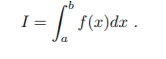

* ### Le principe :

L’idée principale est de trouver des méthodes qui permettent de calculer rapidement une valeur approchée  de l’intégrale à calculer :

Pour presque toutes les méthodes (sauf la méthode de Monte-Carlo), l’intégrale numérique est calculée à
partir de l’évaluation de la fonction f(x) en un nombre de point n + 1 distincts :

**fk = f(xk), k dans  [0, n]. Elle s’écrit alors :**



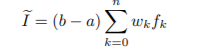

* ### Performances :


- la précision du résultat : Celle-ci se caractérise en estimant l’erreur  entre l’approximation et la valeur réelle de l’intégrale :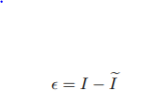

- La rapidité d’exécution nécessaire pour atteindre ce résultat. De manière générale, toutes les méthodes
peuvent atteindre de très grandes précisions. Cependant, le temps de calcul augmente avec la précision. 


  Nous allons voir 4 types de méthodes différentes :
    
    
* La méthode des Rectangles 
    
* La methode de Trapèze 
    
*  La méthode Simpson
    
*  La méthode de point milieu

<span style ="color:orange">
    <h2> 1- methode rectangle
 </h2></span>
 
Cette méthode consiste à remplacer l'intégrale par une somme de Riemann obtenue en prenant une subdivision arithmétique pointée de raison **(b-a)/n**, le point choisi étant le milieu de chaque sous-intervalle. 

<span style ="color:indigo">
  <h2>
      principe
    </h2></span>

Sur chaque intervalle, on réalise ainsi l’approximation suivante :


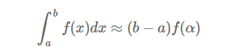
                     


où α est une abscisse appartenant à l’intervalle limité par a et b.

**Pour tracer un rectangle ABCD (voir figure ci-dessous), il suffit de faire un plot avec les coordonnées de A, B, C, D et A. On termine par A pour fermer le tracé.**

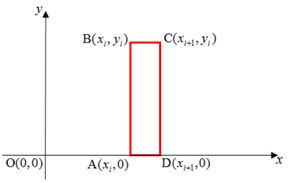

## code RectangleG

<div class="alert alert-success"> Il s’agit de l’aire du rectangle. Cette méthode nécessite une unique évaluation de la fonction f (en x0 =
(a + b)/2) et correspond donc aussi à ce qu’on peut faire de plus rapide.</div>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from numpy import *
class RectangleG ( object ) :
    def __init__ ( self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f =f
        self.n=n
        
    def integrate(self,f):
        x=self.x
        y=f(x)
        h=float(x[1]-x[0])
        s=sum(y[0:-1])
        return h*s
    def Graph (self,f,resolution=1001) :
        xl=self.x
        yl=f(xl)
        xlist_fine=np.linspace(self.a,self.b,resolution)
        for i in range (self.n):
            x_rect= [ xl [ i ] , xl [ i ] , xl [ i + 1 ] , xl [ i + 1 ] , xl [ i ] ] 
            y_rect= [ 0 , yl [ i ] , yl [ i ] , 0 , 0 ]
            plt.plot(x_rect,y_rect,"r")
        yflist_fine =f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("methode_des_rectangle_gauche")
        plt.text(0.5*(self.a+self.b),f(self.b), 'I_{} ={:0.4f} '.format( self.n,self.integrate(f)) , fontsize=15)
        #print(' itegrale approché par méthode des rectangle :I_{} ={:0.4f} '.format( self.n,self.integrate(f)))

In [10]:
from ipywidgets import interact,interactive,fixed,interact_manual,widgets
f=lambda x:1/(1+x**2)
R=RectangleG(0,1,5,f)
print(R)

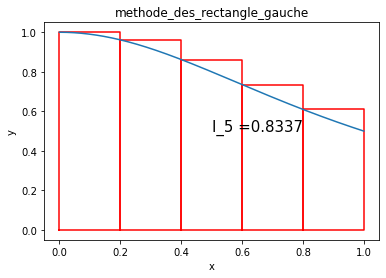

In [11]:
R.Graph(f)

**interpretation :**

<div class="alert alert-success">

- Cette méthode d’intégration est exacte pour toutes les fonctions f constantes . Dans le cas plus général cette méthode est d’autant plus précise que les variations de f sont faibles.
    
    
- Plus le domaine [a, b] est petit, plus l’erreur est faible. Cette erreur décroit en h2
    </div>

<span style ="color:orange">
    <h2> 2- méthode Trapéze
 </h2></span>

La méthode des trapèzes consiste à remplacer la fonction f sur chaque intervalle par une fonction qui sera affine. Pour qu’elle approche bien la courbe, les fonctions que nous allons utiliser sont toutes trouvées : 

pour chaque $x_k$
  de la subdivision, nous allons prendre la fonction qui passe par les points  : $M_k$($x_k$,f($x_k$)) et   $M_k+1$($x_k+1$,f($x_k+1$))



**Sur chaque intervalle, on réalise alors l’approximation suivante :**



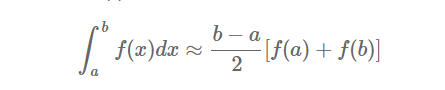

<span style ="color:indigo">
  <h2>
      - principe
    </h2></span>

Justification de la formule :

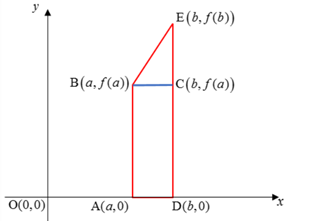

Pour calculer la surface du trapèze ABED, on fait la somme des aires du rectangle ABCD et du triangle rectangle BEC.


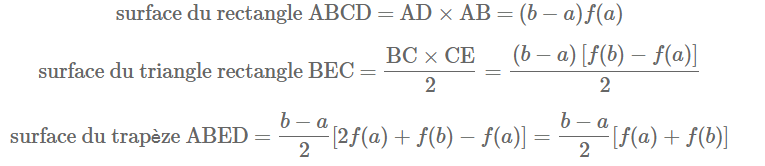

## code trapèze

In [12]:
#methode trapezoide
import matplotlib.pyplot as plt
import numpy as np
from math import *
from numpy import *
class Trapezoidal( object ) :
    def __init__ ( self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f =f
        self.n=n
        
    def integrate(self,f):
        x=self.x
        y=f(x)
        h=float(x[1]-x[0])
        s=y[0]+y[-1]+2.0*sum(y[1:-1])
        return h*s/2.0
    def Graph (self,f,resolution=1001) :
        xl=self.x
        yl=f(xl)
        xlist_fine=np.linspace(self.a,self.b,resolution)
        for i in range (self.n):
            x_rect= [ xl [ i ] , xl [ i ] , xl [ i + 1 ] , xl [ i + 1 ] , xl [ i ] ] 
            y_rect= [ 0 , yl [ i ] , yl [ i+1 ] , 0 , 0 ]
            plt.plot(x_rect,y_rect,"m")
        yflist_fine =f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine)
        plt.plot(xl,yl,"cs")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("methode_des_trapezes")
        plt.text(0.5*(self.a+self.b),f(self.b), 'I_{} ={:0.4f} '.format( self.n,self.integrate(f)) , fontsize=15)
        

In [13]:
def simultrap(n,f):
    T=Trapezoidal(-1,1,n,f)
    return T.Graph(f)

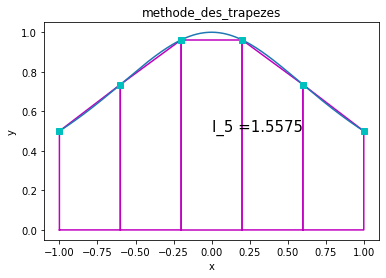

In [14]:
simultrap(5,f)

**interpretation valeur :**

<div class="alert alert-warning">Cette méthode nécessite deux évaluations de la fonction f (en a et en b). Elle
est donc en gros deux fois plus lente que les méthodes précédentes.</div>

<div class="alert alert-success"> cette méthode est plus précise taux d'erreur diminue 
En précision, cette méthode est donc équivalente à celle du rectangle , mais elle est deux fois plus lente.
</div>

<span style ="color:orange">
    <h2> 3- méthode simpson</h2></span>

Il existe de nombreuses méthodes pour réaliser une intégration numérique. Nous allons considérer la méthode de Simpson

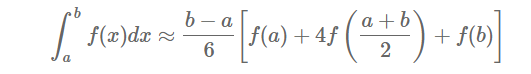


Pour obtenir la formule de Simpson, on va réaliser une interpolation avec **<span style ='color:hotpink'>un polynôme de degré 2</span>**. Un polynôme étant une fonction très facile à intégrer, on approche l’intégrale de la fonction f sur l’intervalle [a,b], par l’intégrale du polynôme sur ce même intervalle.

## Visualisation des polynômes de Lagrange

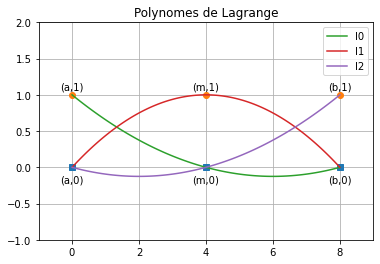

In [15]:
from pylab import *

a = 0
b = 8
m = (a+b)/2

x = linspace(a, b, 101)

l0 = (x-m)/(a-m)*(x-b)/(a-b)
l1 = (x-a)/(m-a)*(x-b)/(m-b)
l2 = (x-a)/(b-a)*(x-m)/(b-m)

plot([a,m,b],zeros(3),"s") # position des valeurs 0
plot([a,m,b],ones(3), "o")  # position des valeurs 1
plot(x,l0, label="l0")
plot(x,l1, label="l1")
plot(x,l2, label="l2")

title("Polynomes de Lagrange")
xlim(-1,9)
ylim(-1,2)
text(a,-0.1,"(a,0)",ha="center",va="top")
text(m,-0.1,"(m,0)",ha="center",va="top")
text(b,-0.1,"(b,0)",ha="center",va="top")
text(a,1.05,"(a,1)",ha="center",va="bottom")
text(m,1.05,"(m,1)",ha="center",va="bottom")
text(b,1.05,"(b,1)",ha="center",va="bottom")
legend()
grid()

show()

## code  simpson

In [16]:
class Simpson (object) :
    def __init__ ( self ,a, b,n, f ) :
        self.a = a
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
    def integrate ( self, f) :
        x=self.x
        y=f(x)
        h=float(x[2] - x[1])
        n =len(x)-1
        s = y[0] + y[-1] + 4.0*sum(y[1:-1])
        return h * s / 4.0
    def Graph ( self,f, resolution=1001) :
        xl=self.x
        yl= f(xl)
        xlist_fine=np.linspace(self.a , self.b,resolution)
        for i in range (self.n) :
            xx = np.linspace(xl[i] ,xl[i+1], resolution)
            m=(xl[i]+xl[i+1])/2
            a= xl[i]
            b= xl[i+1]
            l0=(xx-m)/(a-m)*(xx-b )/(a-b)
            l1=(xx-a)/(m-a )*(xx-b)/(m-b)
            l2=(xx-a )/(b-a)*(xx-m)/(b-m)
            P= f(a)*l0+f(m)*l1+f(b)*l2
            plt.plot(xx,P,"r")
        yflist_fine=f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine,"g")
        plt.plot(xl,yl,"bo")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Methode de simpson')
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

<div class="alert alert-warning">Cette méthode nécessite trois évaluations de la fonction f (en
x0 = a, x1 = (a + b)/2 et x2 = b). Elle est donc en gros 3 fois
plus lente que les méthodes à 1 point.
    </div>

<div class="alert alert-success">
    
    
- Cette méthode d’intégration est exacte pour les fonctions f polynomiales d’ordre 3 , ce qui inclut en particulier les fonctions constantes, les fonctions affines, et les paraboles par exemple. Plus généralement elle est d’autant plus précise que les variations de f sont faibles.
    
    
    
    
- Plus l’intervalle [a, b] est petit, plus l’erreur est faible. Cette erreur décroit en h5 lorsque h diminue, c’est à dire beaucoup plus rapidement que les méthodes précédentes    
    </div>

<span style ="color:orange">
    <h2> methode point milieu </h2></span>


on approche  par 
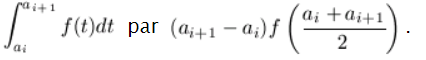

Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des rectangles hachurés en bleu :

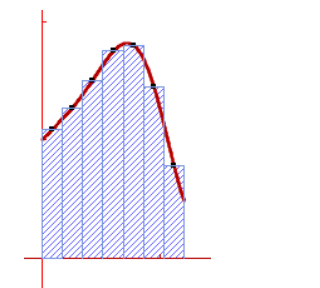

<span style ="color:indigo">
  <h2>
      - principe
    </h2></span>
    
   On subdivise l’intervalle [a;b] en n intervalles de même largeur, égale à (b−a/n). On note ces intervalles I0, I1, …, In−1 et on note Mk(xk;f(xk)) le milieu de Ik **(le “point médian”)**. On construit alors les rectangles de bases Ik et de hauteur f(xk).
    <h2><span style ="color:hotpink">
Plus on fait grandir n, plus les rectangles ont une base petite et plus la somme des aires des rectangles se rapproche de l’intégrale cherchée.
    </span>  </h2>

<div class="alert alert-success">
    
- Du fait des symétries, cette méthode d’intégration est exacte pour les fonctions f constante
    </div>

## code méthode point milieu 

In [17]:
class Milieux( object ) :
    def __init__ ( self,a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
       

    def integrate(self,f):
        h=float(self.b-self.a)/(self.n)
        sum1=0
        for i in range(self.n):
            sum1 += f(self.a+(i+1/2)*h)

        I = h*sum1
        return I

    def Graph ( self , f, resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0 , yl[i], yl[i+1] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
       
        plt.title ( ' Methode de Milieux' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )


## double interaction

In [18]:
# dans le memei interact 
def simulf(a,b,n,f):
   
    R=RectangleG(a,b,n,f)
    T=Trapezoidal(a,b,n,f)
    S=Simpson(a,b,n,f)
    M=Milieux(a,b,n,f)
    fig= plt.figure(figsize=(12,4))
   
    #plt.show()
    #S=Simpson(a,b,n,f)
    plt.subplot(121)
    R.Graph(f)
    plt.subplot(122)
    T.Graph(f)
   
    fig2= plt.figure(figsize=(12,4))
    plt.subplot(221)
    S.Graph(f)
    plt.subplot(222)
    M.Graph(f)

In [19]:




interact(simulf,
   a=widgets.IntSlider(min=0,max=50,step=1,value=1),
 b=widgets.IntSlider(min=1,max=50,step=1,value=15),
 n=widgets.IntSlider(min=0,max=100,step=5,value=10),
      f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)' :lambda x:sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5' :lambda x:x**2-x+5})




from ipywidgets import Button, GridBox, Layout, ButtonStyle
sidebar = Button(description='validate',
                 layout=Layout(width='auto', grid_area='validate') ,style=ButtonStyle(button_color='salmon'))


GridBox(
        layout=Layout(
            width='5%',
            grid_template_rows='auto auto auto',
            grid_template_columns='25% 25% 25% 25%',
            grid_template_areas='''
            "                          "
            "main main . sidebar "
        
            ''')
       )


interactive(children=(IntSlider(value=1, description='a', max=50), IntSlider(value=15, description='b', max=50…

GridBox(layout=Layout(grid_template_areas='\n            "                          "\n            "main main …

<span style ="color:orange">
    <h2> Example with insert textBox</h2></span>

In [22]:
from ipywidgets import interact,Layout
import ipywidgets as widgets
import numpy as  np
import matplotlib.pyplot as plt


# create some control elements
sel = widgets.Dropdown(
      options=[('Methode des rectangles gauches',1) ,('methode des trapézes' ,2 ),('methode de simpson' ,3),
               ('methode des points milieu' ,4)],
    
     value =2,
    description='Méthode',
)


#int_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description='freq')
text_func= widgets.Text(value='cos(x)', description='fonction ', continuous_update=False)
#color_picker = widgets.ColorPicker(value=initial_color, description='pick a color')
text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)
text_a = widgets.Text(value='1', description='a', continuous_update=False)
text_b = widgets.Text(value='1', description='b', continuous_update=False)
text_n = widgets.Text(value='3', description='n', continuous_update=False)
text_int= widgets.Text(value='', description='I_n', continuous_update=False)
button=widgets.Button (description="calculer")
 
# callback functions

def sim(b):
    dic={1:RectangleG ,2:Trapezoidal,3:Simpson,4:Milieux}
    s=sel.value
    plt.cla()
    func=lambda x:eval (text_func.value)
    R=dic[s](float(text_a.value),float(text_b.value),int(text_n.value),func)
    R.Graph(func)
    text_int.value=str(R.integrate(func))
   # text_int.description'I_n'   

def update_a(change):
    """redraw line (update plot)"""
    change.new
    
def update_b(change):
    """redraw line (update plot)"""
    change.new
def update_n(change):
    """redraw line (update plot)"""
    change.new
def update_f(change):
    """redraw line (update plot)"""
    change.new  
def update_t(change):
    """redraw line (update plot)"""
    change.new      
     

 

button.on_click(sim)
# connect callbacks and traits

text_func.observe(update_f, 'value')
text_a.observe(update_a, 'value')
text_b.observe(update_b, 'value')
text_n.observe(update_n, 'value')
text_int.observe(update_t, 'value')

output=widgets.Output()

#controls = widgets.VBox([sel,text_a,text_b,text_n,text_func,button])
#widgets.HBox([controls])


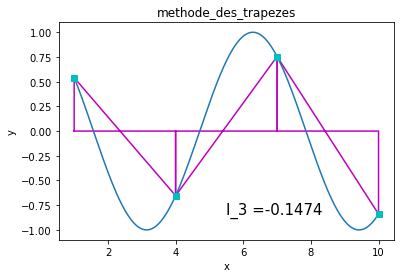

In [23]:

from ipywidgets import interact,interactive,fixed,interact_manual,widgets   
def make_boxes():
    vbox1 = widgets.VBox([widgets.Label('Left'),sel,text_a,text_b,text_n,text_func,button,text_int])
    vbox2 = widgets.VBox([widgets.Label('Right'),output])
    return vbox1, vbox2
 
vbox1, vbox2 = make_boxes()
 
#widgets.HBox([vbox1, vbox2])


#box_layout=widgets.Layout(
#                  border='solid 2px gray',
#                  margin= '0px 10px 0px',
#                paddings='5px 5px 5px 5px')

vbox1,vbox2=make_boxes()

widgets.HBox([vbox1,vbox2])


## <span style ="color:hotpink">analyse :</span>

### Calcul réelle de l'intégrale sur un intervalle [0,1] :

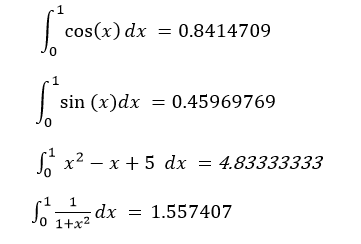


### Methode rectangle calcul integrale :
 





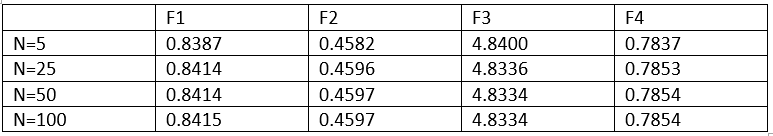

### Methode trapéze calcul integrale :

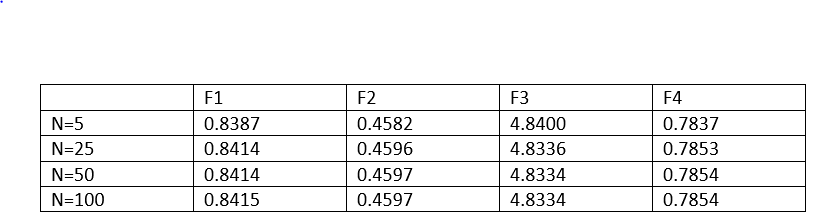

en comparant le valeurs approché au valeur integrale :

- les méthodes de rectangle et de trapéze sont plus rapide mais moins exacte 

- on remarque que la methode la plus exacte est celle du point milieu est toujours plus précise que la méthode précédente. 

- pour toute les méthodes ,on affirme que plus le domaine [a, b] est petit on augmentant "n", plus l’erreur est faible